In [1]:
from helpers import * 
from canonical_order_kant import *
from simple_four_con import graph_data
from rel import * 
from boundary_cycle import *
from convex_boundary import *

from graph_checks import *

In [2]:
def get_node_labels(node_list):
    labels = {}
    for node_index in node_list:
        labels[node_index] = [co.get_node_data(node_index).order]
    return labels


In [3]:
def get_init_nodes():
    init_nodes = []
    for node_index in co.G.nodes:
        if co.get_node_data(node_index).order != -99 or co.get_node_data(node_index).visited != 1:
            init_nodes.append(node_index)

    labels = get_node_labels(init_nodes)
    return init_nodes, labels

In [4]:
def get_relev_nodes():
    init_nodes = []
    for node_index in co.G.nodes:
        if co.get_node_data(node_index).order != -99:
            init_nodes.append(node_index)

    labels = get_node_labels(init_nodes)
    return init_nodes, labels

In [5]:
def check_nb_conditions(Gk_minus, co:KantCanonicalOrder, vk):
    cb = ConvexBoundary(GraphData(Gk_minus, co.embed))
    nbs = [n for n in nx.neighbors(co.G, co.current_node_index)]
    # G_nb = nx.Graph(nx.subgraph(co.G, nbs))

    # filter out nbs that have already been ordered 
    ordered_nbs = []
    unordered_nbs = []
    for node in nbs:
        if node in co.ordered_nodes:
            ordered_nbs.append(node)
        else: 
            unordered_nbs.append(node)

    G_unordered_nb =  nx.Graph(nx.subgraph(co.G, unordered_nbs))

    try:
        # check have enough ordered neighbiurs 
        if vk < len(co.G.nodes) -2:
            assert len(ordered_nbs) == 2, "Not enough ordered nbs"
        
        # check nbs are in boundary of Gk_minus
        
        a, b = freeze_list_of_tuples(G_unordered_nb.edges, cb.cycle_edges)
        overlapping_edges = a.intersection(b)
        assert len(list(overlapping_edges)) == len(G_unordered_nb.edges), "Neighbours not in outer boundary"


    except AssertionError:
        return cb, G_unordered_nb, nbs
    
    return 

def check_biconnected(Gk_minus):
    try:
        test_biconnect(Gk_minus)
    except AssertionError:
        print("Test biconnect failed")
        return Gk_minus
    return

In [6]:
def get_Gk_1(vk):
    vk_1_nodes = []
    for node_index in co.G.nodes:
        if co.get_node_data(node_index).order < vk:
            vk_1_nodes.append(node_index)

    labels = get_node_labels(vk_1_nodes)
    Gk_minus = nx.subgraph(co.G, vk_1_nodes)
    return vk_1_nodes, labels, Gk_minus

def check_conditions(vk):
    # biconnected
    _, _, Gk_minus = get_Gk_1(vk)

    res1 = check_biconnected(Gk_minus)
    if res1:
        return res1
    
    res2 = check_nb_conditions(Gk_minus, co, vk)

    return res2

   

### Testing

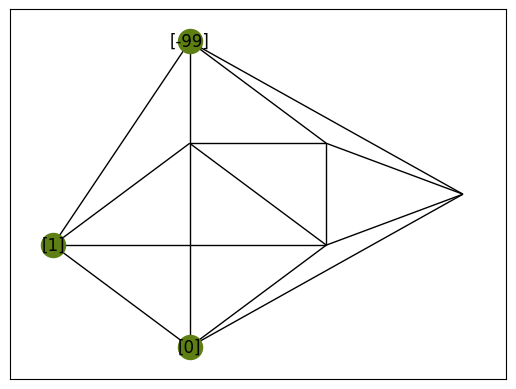

In [7]:
co = KantCanonicalOrder(copy.deepcopy(graph_data))
co.initialize_order()
init_nodes, labels = get_init_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

ic| co.vk: 6, co.vk+1: 7


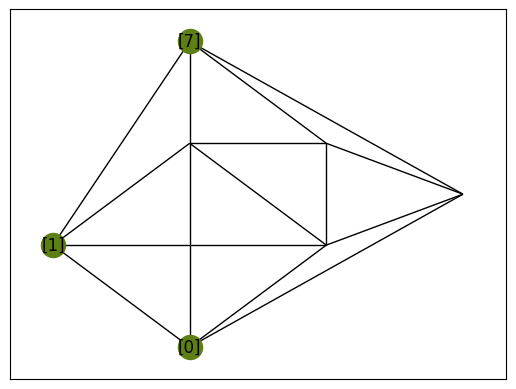

In [8]:
co.order_next_node()
# need to check if biconnected..
ic(co.vk, co.vk+1)
_ = check_conditions(co.vk +1)

init_nodes, labels = get_relev_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

ic| f"updating chords for {node_index} to {num_chords}": 'updating chords for 1 to 1'
ic| co.vk: 5, co.vk+1: 6


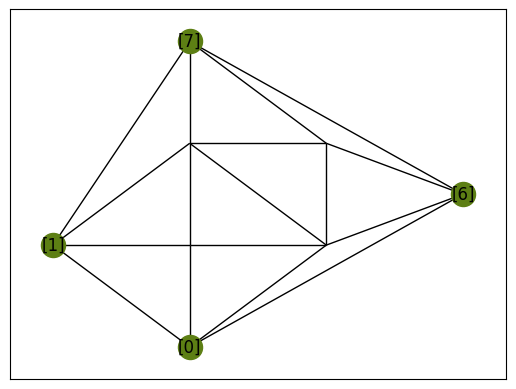

In [9]:
co.order_next_node()
# need to check if biconnected..
ic(co.vk, co.vk+1)
res = check_conditions(co.vk +1)


init_nodes, labels = get_relev_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

ic| co.vk: 4, co.vk+1: 5


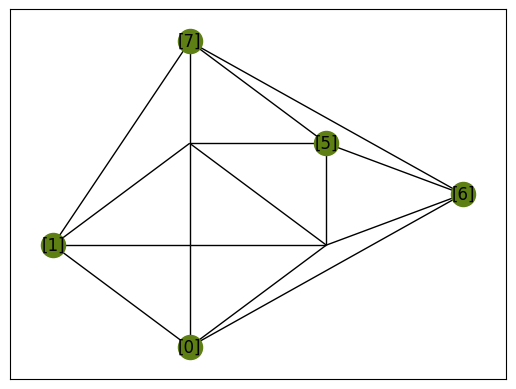

In [10]:
co.order_next_node()
# need to check if biconnected..
ic(co.vk, co.vk+1)
res = check_conditions(co.vk +1)

init_nodes, labels = get_relev_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

ic| co.vk: 3, co.vk+1: 4


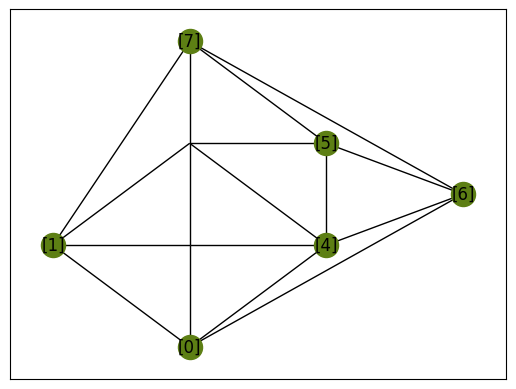

In [11]:
co.order_next_node()
# need to check if biconnected..
ic(co.vk, co.vk+1)
res = check_conditions(co.vk +1)

init_nodes, labels = get_relev_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

In [13]:
co.G_chord_analysis.nodes

NodeView((0, 1, 6, 7))

In [16]:
co.vk

3

In [18]:
co.current_node_index

5

In [17]:
valid_nbs = [nb for nb in co.G.neighbors(co.current_node_index) if co.get_node_data(nb).mark == False]
valid_nbs

[6, 7, 1]

In [20]:
for node in valid_nbs + [co.current_node_index]:
    if node in co.G_chord_analysis.nodes:
        ic(node)
        nbs = [nb for nb in co.G_chord_analysis.neighbors(node)]
        if len(nbs) > 2:
            num_chords = len(nbs) - 2
            ic(f"updating chords for {node} to {num_chords}")
            co.get_node_data(node).update_chords(num_chords)
        
        if len(nbs)  == 0 and co.get_node_data(node).chords != 0:
            # TODO only want to do this if num_chords was previously not 0 .. 
            ic(f"{node} has no chords")
            co.get_node_data(node).update_chords(num_chords)

ic| node: 6
ic| node: 7
ic| f"updating chords for {node} to {num_chords}": 'updating chords for 7 to 1'
ic| node: 1


In [12]:
_, _, gkm = get_Gk_1(4)
gkm.nodes

NodeView((0, 1, 6, 7))

In [13]:
co.vk

3

In [14]:
co.current_node_index

5

In [14]:
show_graph_attributes(co.G)

("Node 0: {'data': NodeCanonicalOrder({'index': 0, 'order': 1, 'mark': False, "
 "'visited': 2, 'chords': 0})}")
("Node 1: {'data': NodeCanonicalOrder({'index': 1, 'order': -99, 'mark': "
 "False, 'visited': 3, 'chords': 1})}")
("Node 2: {'data': NodeCanonicalOrder({'index': 2, 'order': 7, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 3: {'data': NodeCanonicalOrder({'index': 3, 'order': 5, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 4: {'data': NodeCanonicalOrder({'index': 4, 'order': 6, 'mark': True, "
 "'visited': 2, 'chords': 0})}")
("Node 5: {'data': NodeCanonicalOrder({'index': 5, 'order': 4, 'mark': True, "
 "'visited': 3, 'chords': 0})}")
("Node 6: {'data': NodeCanonicalOrder({'index': 6, 'order': 0, 'mark': False, "
 "'visited': 3, 'chords': 0})}")
("Node 7: {'data': NodeCanonicalOrder({'index': 7, 'order': -99, 'mark': "
 "False, 'visited': 3, 'chords': 0})}")


## failing code

ic| f"finished running - vk in loop {self.vk}": 'finished running - vk in loop 2'
ic| co.vk: 2, co.vk+1: 3


Test biconnect failed


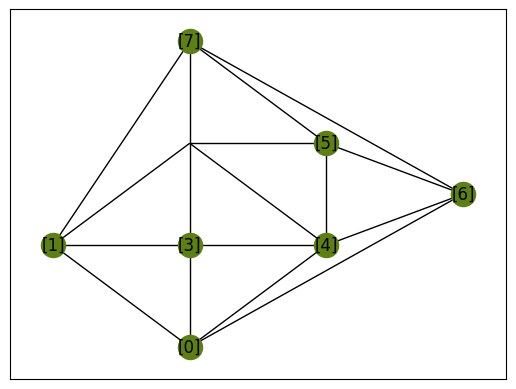

In [15]:
co.order_next_node()
# need to check if biconnected..
ic(co.vk, co.vk+1)
res = check_conditions(co.vk +1)

init_nodes, labels = get_relev_nodes()
nx.draw_networkx(co.G, co.embed, nodelist=init_nodes, node_color="#5d7f14", labels=labels)

In [16]:
res.nodes

NodeView((0, 1, 6))

why for the rel does it matter that the canonical ordering is biconnected?
need to have some sort of spatial map of radiation / how it changes over time.. 